# Lab Lesson

## Processing Data with Python, Part 1

### Topics

* introduction to/motivation of pandas
* analyzing real-life data
* Series
* DataFrames
* manipulating DataFrames with Index

### Resources

For more information, see following books on Python and data analysis:

* [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), by Jake VanderPlas. This link is to the entire book in Jupyter notebook form.
* [Python for Data Analysis](https://proquest.safaribooksonline.com/9781491957653), by Wes McKinney. This book is available for free through the Pitt library.  

### Exercises

Back to the normal notebook-of-exercises format for the next few weeks! The exercises for this week build on what we talked about today, and they primarily focus on a set of data about individual Chipotle orders. 

**TURNING IT IN:** Submit your completed Jupyter notebook on Canvas by the deadline. Don't submit any other files.

# So, what is pandas anyway?

`pandas` is a third-party Python library for doing data analysis. It's developed and maintained by [Wes McKinney](http://wesmckinney.com/pages/about.html), who at the time of initial development was working in finance. Suffice to say, **pandas is very much beta software**, like JupyterLab. There are going to be some bugs, design flaws, and other issues that you're going to run into; I'll address them as they come up in class, and if you run into them on your own, we can work through them together in office hours.

pandas is a foundational part of using Python for data science. Most if not all things that pandas does can be done with plain-jane Python, but, most of the time, pandas does them *faster* and *easier*. It's built on top of another extremely powerful third-party Python library called `numpy`; if you are doing data analysis on a huge scale, consider `numpy`.

## Why are *we* using pandas?

We're using pandas because it has a powerful set of *structures* and *functions* that make working with large datasets simple. Once you learn these structures and functions, it becomes extremely easy to answer any question you want to ask with a given data set. This is my definition of **data analysis**: answering questions asked of data.

pandas also interacts nicely with a bunch of other Python libraries and programs, which make doing data science easier.

* Jupyter notebooks, of course, allow you to construct computational narratives with code, data, and text. Displaying dataframes (one of pandas' data structures) as an inline HTML table is one of the major interactions between Jupyter and pandas.
* [Matplotlib](https://matplotlib.org/) is an incredibly powerful graphing library for Python. Generating plots from dataframes is simple with matplotlib and pandas.
* pandas also integrates with scientific computing/machine learning Python libraries, like [SciKit](http://scikit-learn.org/stable/) and [SciPy](https://www.scipy.org/).

# pandas basics

Importing pandas is simple.

In [3]:
import pandas as pd

%matplotlib inline

You can use the `as` keyword in Python to specify a different name for a library you're importing. Here, I'm telling Python that I'm going to use the term `pd` whenever I want to use pandas functions. It's basically like giving a Python library a nickname.

That second line, `%matplotlib inline`, is a specifier within Jupyter for the `matplotlib` library, which, as we already discussed, is for making 2D graphs and charts from data. This specifies that any plots we generate are displayed below the code block, like Jupyter normally does. We'll see this later.

## Diving into data

We're going to do some stuff with a dataset that I provided for y'all here. It contains information about attendance at various community centers in Pittsburgh. 

I said at the beginning of this lecture that pandas allows us to ask questions of data and get answers from it. In our analysis, we want to answer the following question of this dataset:

&nbsp;&nbsp;&nbsp;&nbsp; **Which community center has had the most attendance over time?**

**NOTE**: It's important to look at the **comments** in the code we're running through today. I'll be describing what's going on, line by line, by commenting my code. Confused as to what something does? Look at the comments first.

In [4]:
# load in the community center data file
data = pd.read_csv("community-center-attendance-2019.csv", index_col="date", parse_dates=True)

# look at the first ten rows of the data
data.head(10)

,center_name,attendance_count
date,,
2019-10-11,Phillips Community Center,64
2019-10-11,Warrington Community Center,68
2019-10-11,Ammon Community Center,32
2019-10-11,Brookline Community Center,59
2019-10-11,Jefferson Community Center,29
2019-10-11,Magee Community Center,27
2019-10-11,Ormsby Community Center,11
2019-10-11,Paulson Community Center,1
2019-10-11,West Penn Community Center,47


As you can see, this has the name of the community center and the attendance, all organized in chronological order. Let's see what the attendance values look like over time.

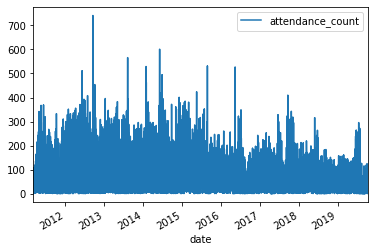

In [5]:
# no prizes for guessing what this does
data.plot()

We can **pivot** the data so the center names are columns and each row is the number of people attending that community center per day. This is basically rotating the data; it's a common data operation. You'll often hear accountant-types talking about "pivot tables" in Excel. This is like that, but way better.

In [6]:
# use the pivot function to make row values into data columns
data.pivot(columns="center_name", values="attendance_count").head()

center_name,Ammon / Josh Gibson Field,Ammon Community Center,Ammon Pool,Arlington Community Center,Arlington Field (Playground),Brookline Community Center,Burgwin Field,Dan Marino Field (Playground),Frick Environmental Center,Gladstone Field,...,Paulson Community Center,Paulson Field,Phillips Community Center,Phillips Park Field,Schenley Ice Rink,Warrington Community Center,Warrington Field,West Penn Community Center,West Penn Fields,West Penn Pool
date,,,,,,,,,,,,,,,,,,,,,
2011-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
2011-03-08,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2011-03-09,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-10,NaN,1.0,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,32.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN
2011-03-11,NaN,19.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,...,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's a little ugly, because whenever there's no attendance data for a center on a given day, the default is `NaN`, or "not a number". Thanks, Python. That's really useful.

Maybe we should consider separating the attendance values for each center. Let's first get a list of how much attendance data we have for each center.

In [7]:
# count the number of rows per center
data.groupby("center_name").count()

,attendance_count
center_name,
Ammon / Josh Gibson Field,1
Ammon Community Center,2180
Ammon Pool,3
Arlington Community Center,1414
Arlington Field (Playground),1
Brookline Community Center,2554
Burgwin Field,5
Dan Marino Field (Playground),1
Frick Environmental Center,1


Hm. We don't have a ton of data for quite a few centers, either because they don't report attendance all that often, or they just aren't open all that often. 

So, we're going to write a function that'll filter out any community center that doesn't have a lot of attendance data. We'll apply that filter to ever row in the dataframe using the [groupby filter function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.filter.html). 

This is... a little esoteric. What we're doing is using a special type of filter function called a *lambda* that, instead of doing something itself, will apply a function *we write* to each row. **This sounds more complicated than it is.** All we're doing is testing to see if each community center has more than 1000 attendance values; that's our standard.

In [ ]:
# create a function we will use to perform a filtering operation on the data
# filter out centers that have less then 1000 total entries

# FUNCTION HERE

# use the custom function to filter out rows
popular_centers = data.groupby("center_name").filter(<NAME_OF_FILTER_FUNCTION>, 
                                                     threshold=1000)
# look at what centers are in the data now
popular_centers.groupby("center_name").count()

That looks better. Now we've got some good data to work with! Let's look at the data again, now that we've filtered it. 

**NOTE**: Part of that above code renames our data. Instead of calling it `data`, like at the beginning, we named our filtered dataset to `popular_centers`.

In [ ]:
# get the first 5 rows
popular_centers.head(5)

In [ ]:
# plot it
popular_centers.plot()

This plot... isn't great. It just doesn't do a great job at displaying anything useful. Let's try pivoting again, now that we've eliminated some of the sparser columns. 

In [ ]:
# use the pivot function to make rows into columns with only the popular community centers
pivoted_data = popular_centers.pivot(columns="center_name", values="attendance_count")
pivoted_data.head()

Not nearly as bad as before! Now, we can plot the attendance over time of individual community centers.

In [ ]:
# plot the data! 
pivoted_data.plot(figsize=(10,10))

Pretty messy, but definitely better. Now, let's calculate the **cumulative sum**, a measure that will add up attendance over time. This can give us both attendance values *and* a general sense of how they're changing over time.

In [ ]:
# compute the cumulative sum for every column and make a chart
pivoted_data.cumsum().plot(figsize=(10,10))

Brookline seems to be the winner, but attendance isn't growing as it has been in the past. Let's look at month-by-month attendance.

In [ ]:
# resample and compute the monthly totals for the popular community centers
pivoted_data.resample("M").sum().plot(figsize=(10,10))

Hmm, that's way too much noise. Let's plot it by year, instead. That's as simple as changing the `M` to a `Y`.

In [ ]:
# resample and compute the yearly totals for the popular community centers
pivoted_data.resample("Y").sum().plot(figsize=(10,10))

And now, hey presto, we've turned this unwieldy, huge dataset into something that we can use to answer questions. 

# Let's talk data structures

The major thing that pandas brings to Python is three new data structures: the Series, the Dataframe, and the Index. 

## Series: a list, but a dictionary

A series is a *one-dimensional array* of *indexed* data. Let's break that down.

* **one-dimensional**: only one column of data
* **array**: a contiguous representation of the data (i.e. data[2] comes after data[1])
* **indexed**: the data has indices that you use to access the data. These can be numbers or other, more complicated keys.

Here's a default, empty Series. What do you get when you run that? What about if you take the `type()` of it?

In [10]:
pd.Series()

Series([], dtype: float64)

You can create a Series from a single Python list. When you do that, the indices are just numbers, starting from 0.

In [11]:
# create a regular Python list
my_list = [0.25, 0.5, 0.75, 1.0]

# transform that list into a Series
data = pd.Series(my_list)

# display the data in the series
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

A Series is kind of like a list, in that *order matters*. The first element will always be before the second element, and so on. You can use indexing to grab an item in a series, like so:

In [12]:
# get the first item in the series
data[0]

0.25

pandas makes this way more powerful and a little harder with the `.iloc` function. You can use `.iloc` to index a Series. This is the idiomatic "pandas-y" way to do it.

In [13]:
# get the first item, but pandas-y, with iloc
data.iloc[0]

0.25

In [14]:
# go crazy, grab the fourth element
data.iloc[3]

1.0

All of the normal Python indexing styles work with `.iloc`. You can use *slicing* to grab certain sub-lists within a Series.

In [15]:
# get the first two elements
data.iloc[0:2]

0    0.25
1    0.50
dtype: float64

In [16]:
# get the last two elements
data.iloc[2:]

2    0.75
3    1.00
dtype: float64

### Alternate indices

You can also think of a Series as a Python dictionary. The main difference is that **order matters in a Series**. You can grab things by their name, in addition to their numerical index, and you can generate a Series from a dictionary.

In [17]:
# create a regular Python Dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

# make that dictionary into a Series 
population = pd.Series(population_dict)

# display the data
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

You can also make a named Series from two independent Python lists.

In [18]:
# create two ordered lists
population_list = [38332521, 26448193, 19651127, 19552860, 12882135]
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

# Create a Series from those two lists
population = pd.Series(population_list, index=states)

# display the data
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

You can index and slice, just like we did before, but you can use the keys instead of the numbers! You use the `.loc` method, which just stands for "location", to access items from their named keys.

In [19]:
# select the data value with the name "California"
population.loc['California']

38332521

You can do slicing with these keys, too!

In [20]:
population.loc['Texas':'Florida']

Texas       26448193
New York    19651127
Florida     19552860
dtype: int64

----

### **Group Assignment**: some indexing questions

Answer the following questions concerning `.iloc`, `.loc` and Series indexing with pandas.

1. Make a pandas Series from a Python list that contains the following numbers: `[0.1, 0.3, 0.75, 1.2, 1.6]`
2. Use `iloc` and slices to grab the second and third elements of your Series.
3. Grab the last element of your Series.
4. **As a challenge**, grab the last element of your Series without using the length of the list. You can't use slicing or just say `iloc[4]`. There's a way to do it, search around. (Hint: think small.)
5. Create another Series from the following dictionary:
    ```
    {'Aaron': 65,
     'Lauren': 24,
     'Joseph': 49,
     'Mallory': 32,
     'Eric': 19,
     'Jeff': 84}
     ```
6. Print out Lauren's age, using the `.loc` method.
7. Print out the elements between Joseph and Jeff using `.loc`.
8. Do the same thing, but with numerical slicing using `.iloc`.

----

# Dataframe: adding a dimension

A pandas DataFrame is the main way to display and manipulate data with pandas. You're going to be suuuuuper familiar with DataFrames by the time we're done here. 

A DataFrame is just a two-dimensional Series. It's like a table, or an Excel spreadsheet. Functionally, it's a Series-of-Serieses, a bunch of Series lined up together.

In [21]:
# remember our population Series?
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [22]:
# let's make one for the areas, too!
area_dict = {'Illinois': 149995, 'California': 423967, 
             'Texas': 695662, 'Florida': 170312, 
             'New York': 141297}
area = pd.Series(area_dict)
area

Illinois      149995
California    423967
Texas         695662
Florida       170312
New York      141297
dtype: int64

In [23]:
# now, we create a dictionary containing both of our dictionaries
# meta, huh?
state_info_dictionary = {'population': population,
                       'area': area}

# then we mash them together into a DataFrame
states = pd.DataFrame(state_info_dictionary)
# let's check our work!
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


pandas just takes care of lining everything up, because our indices (state names) are the same across our two dictionaries!

You can also generate a DataFrame from a list of dictionaries, and from a list of lists.

In [24]:
# create a list of dictionaries that contain our data.
# one dictionary per observation/row
dead_people = [
    {"ssn":1, "first_name": "Bob", "last_name": "Jones", "age": 200},
    {"ssn":2, "first_name": "Jane", "last_name": "Jones", "age": 199},
    {"ssn":3, "first_name": "Ethel", "last_name": "Jones", "age": 180},
    {"ssn":4, "first_name": "Hortense", "last_name": "Jones", "age": 178},
    {"ssn":5, "first_name": "Vern", "last_name": "Jones", "age": 178}
]

# create a DataFrame from a list of dictionaries
pd.DataFrame(dead_people)

,ssn,first_name,last_name,age
0,1,Bob,Jones,200
1,2,Jane,Jones,199
2,3,Ethel,Jones,180
3,4,Hortense,Jones,178
4,5,Vern,Jones,178


If you create a DataFrame from a list of lists, you can either specify the row indices, or it'll automatically number them, starting at 0.

In [25]:
# auto-number the rows

# create a list of lists, each sub-list is an observation/row
dead_people = [
    [1,"Bob","Jones",200],
    [2,"Jane","Jones",199],
    [3,"Ethel","Jones",180],
    [4,"Hortense","Jones",178],
    [5,"Vern","Jones",178]
]

# specify the column names separately
column_names = ["ssn","first_name", "last_name", "age"]

# make a DataFrame with column names specified separately
pd.DataFrame(dead_people, columns=column_names)

,ssn,first_name,last_name,age
0,1,Bob,Jones,200
1,2,Jane,Jones,199
2,3,Ethel,Jones,180
3,4,Hortense,Jones,178
4,5,Vern,Jones,178


In [26]:
# specify the row indices

# create a list of lists, each sub-list is an observation/row
dead_people = [
    [1,"Bob","Jones",200],
    [2,"Jane","Jones",199],
    [3,"Ethel","Jones",180],
    [4,"Hortense","Jones",178],
    [5,"Vern","Jones",178]
]

# specify the column names separately
column_names = ["ssn","first_name", "last_name", "age"]

row_ids = [123,3452,3235,4345,563463]

# make a DataFrame with column names specified separately
dead_dataframe = pd.DataFrame(dead_people, columns=column_names, index=row_ids)
dead_dataframe

,ssn,first_name,last_name,age
123,1,Bob,Jones,200
3452,2,Jane,Jones,199
3235,3,Ethel,Jones,180
4345,4,Hortense,Jones,178
563463,5,Vern,Jones,178


# Index and DataFrame slicing

In pandas, the Series and the DataFrame are both containers for data; they store information. The Index is what makes that data useful.

* In a Series, the Index is the key to each value in the list.
* In a DataFrame, the index is the column name. There is also an index for each row.

You can use indexing to merge otherwise disparate datasets. Remember our list of states?

In [27]:
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


You can also access the column and row labels, programmatically, using the `.columns` and `.index` functions. 

In [28]:
# get the column labels as a list-like data structure
states.columns

Index(['population', 'area'], dtype='object')

In [29]:
# get the row labels as a list-like data structure
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

We can use `.loc` and `.iloc`, and indexing, on DataFrames too! `.loc` lets us select specific rows and columns by their name. The syntax for indexing a DataFrame is `[ROW, COLUMN]`, where `ROW` and `COLUMN` are the index values.

In [30]:
# let's get Illinois' population
states.loc["Illinois", "population"]

12882135

This can get really powerful, really quickly. 

You can use slicing within a row or column when indexing a DataFrame; this includes the `:` operator, which selects all indices. You can also use a list in place of a row or column to select all items on that list from the DataFrame.

In [31]:
# two-dimensional slicing

# get the area for states from Florida to Texas
states.loc["Florida":"Texas", "area"]

Florida     170312
Illinois    149995
New York    141297
Texas       695662
Name: area, dtype: int64

In [32]:
# using a list to select values

# get the area for Florida and Texas
states.loc[["Florida", "Texas"], "area"]

Florida    170312
Texas      695662
Name: area, dtype: int64

In [33]:
# use a ":" to specify "all columns"

# get area and population for Florida and Texas
states.loc[["Florida", "Texas"], :]

,population,area
Florida,19552860,170312
Texas,26448193,695662


In [34]:
# select all the rows and columns
states.loc[:,:]

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


And this all works for `.iloc`, too.

In [35]:
# two-dimensional slicing

# get the area for states from Florida to Texas
states.iloc[1:, 1]

Florida     170312
Illinois    149995
New York    141297
Texas       695662
Name: area, dtype: int64

In [36]:
# using a list to select values

# get the area for Florida and Texas
states.iloc[[1, 4], 1]

Florida    170312
Texas      695662
Name: area, dtype: int64

In [37]:
# using a list with -1 index to select values to the end

# get the area for Florida and Texas
states.iloc[[1, -1], 1]

Florida    170312
Texas      695662
Name: area, dtype: int64

In [38]:
# using a ":" to specify "all columns"

# get area and population for Florida and Texas
states.iloc[[1, -1], :]

,population,area
Florida,19552860,170312
Texas,26448193,695662


# Iterating through a DataFrame

Sometimes you might want to go through each row in a DataFrame one at a time. Luckily, pandas has a function called `iterrows` that lets you accomplish this. The basic blueprint looks like this:

```python
# df is the name a of a dataframe that we have already created
for index, row in df.iterrows():
    # do stuff with each row
```

Note that when you loop through the data frame, it *unpacks* the row into two separate parts: the row index, and the actual contents of the row.

The loop variable `row` is a dictionary. Each column name in the data frame is a key in the dictionary; the value associated with the key is the value of that column in that particular row.

Now let's see some examples of how we can use `iterrows` to loop through a dataframe. We will use our `states` dataframe in all of these examples.

## Print out every index one by one

In [39]:
# use states.iterrows() because we are iterating through the states dataframe
for index, row in states.iterrows():
    print(index)

California
Florida
Illinois
New York
Texas


# Print out every row one by one

In [41]:
# use states.iterrows() because we are iterating through the states dataframe
for index, row in states.iterrows():
    print(row)
    print() # add a blank space between each row

population    38332521
area            423967
Name: California, dtype: int64

population    19552860
area            170312
Name: Florida, dtype: int64

population    12882135
area            149995
Name: Illinois, dtype: int64

population    19651127
area            141297
Name: New York, dtype: int64

population    26448193
area            695662
Name: Texas, dtype: int64



Each row is a dictionary with two keys: `population` and `area`. The values associated with those keys are the population and area of that row.

## Printing out the population for each row

In [42]:
# use states.iterrows() because we are iterating through the states dataframe
for index, row in states.iterrows():
    population = row['population']
    print(population)

38332521
19552860
12882135
19651127
26448193


## Printing out the area for each row

In [43]:
# use states.iterrows() because we are iterating through the states dataframe
for index, row in states.iterrows():
    area = row['area']
    print(area)

423967
170312
149995
141297
695662


## Adding up the total population in all the rows

In [44]:
# create a variable to keep track of the total population
total = 0

# loop through each row one at a time
for index, row in states.iterrows():
    # get the population of the current row
    population = row['population']
    
    # update the total to include the current population
    total = total + population

print(total)

116866836


## One last note
As you can imagine, being able to loop through the rows opens up a lot of possibilities for performing data analysis. However, writing a for loop to go through each row manually is actually quite inefficient. Luckily, pandas has many built in functions that allow you to accomplish the tasks that you would want to accomplish with looping. These *functions* take advantage of the *structure* of the dataframe! You'll learn about all of this next week.

# The end!

That's it for today! There's a bit more slicing in your lab exercises for the week, and some more serious data analysis as well. Any questions before we begin?